In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import matplotlib.pyplot as plt

class RK4:
    def __init__(self, x, y, h):
        self.x = x
        self.y = y
        self.h = h
        self.k = None
        self.n = 10  # number of steps

        # RK4 result storage
        self.x_values = []
        self.y_values = []

        # Euler result storage
        self.euler_x = []
        self.euler_y = []

    def f(self, a, b):
        return a + b  # Example ODE: dy/dx = x + y

    def evaluate(self):
        h = self.h
        x = self.x
        y = self.y
        k1 = h * self.f(x, y)
        k2 = h * self.f(x + h / 2, y + k1 / 2)
        k3 = h * self.f(x + h / 2, y + k2 / 2)
        k4 = h * self.f(x + h, y + k3)
        self.k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        return y + self.k

    def euler_step(self, x, y):
        return y + self.h * self.f(x, y)

    def calculate(self):
        # Initial values
        x_rk = self.x
        y_rk = self.y
        x_eu = self.x
        y_eu = self.y

        self.x_values.append(x_rk)
        self.y_values.append(y_rk)
        self.euler_x.append(x_eu)
        self.euler_y.append(y_eu)

        for i in range(self.n):
            # RK4
            self.x = x_rk
            self.y = y_rk
            y_rk = self.evaluate()
            x_rk += self.h
            self.x_values.append(x_rk)
            self.y_values.append(y_rk)

            # Euler
            y_eu = self.euler_step(x_eu, y_eu)
            x_eu += self.h
            self.euler_x.append(x_eu)
            self.euler_y.append(y_eu)
        print(x_rk,y_rk)
        # Plotting both methods
        plt.plot(self.x_values, self.y_values, color='green', marker='o', label='RK4 Method')
        plt.plot(self.euler_x, self.euler_y, color='blue', linestyle='--', marker='x', label='Euler Method')
        plt.title('Comparison: RK4 vs Euler Method')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()


3.000000000000001 12.309678464810993


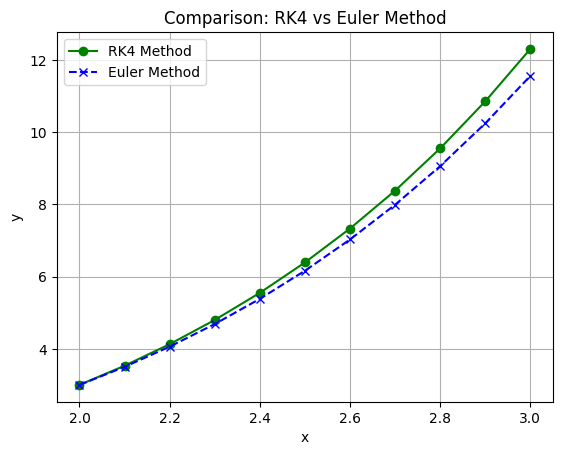

In [3]:
rk = RK4(x=2, y=3, h=0.1)
rk.calculate()
